# Multiple linear Regression for profit prediction

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Problem statement:
Your company has appointed you to create a ML model which should be able to predict the profit of the companies inorder to make the investment decision easier and faster using the dataset of the previous companies you have invested in.

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/goradbj/MachineLearning/main/Regression/mlr_data.csv")

In [8]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.shape

(50, 5)

In [12]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
# extracting x and y or divide input and output
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Creating pairplots/relationship using matplotlib

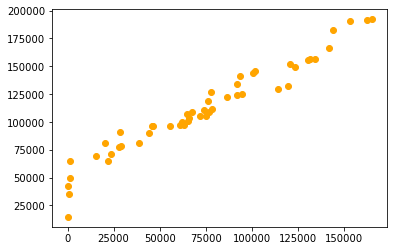

In [14]:
plt.scatter(x[:,0],y,c='orange') #all row and column 1 in x
plt.show()

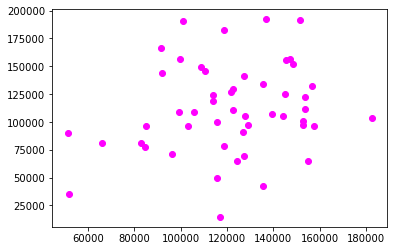

In [17]:
plt.scatter(x[:,1],y,c='magenta')
plt.show()

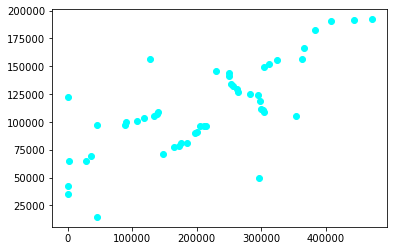

In [15]:
plt.scatter(x[:,2],y,c='cyan')
plt.show()

#### Creating pairplots using seaborn

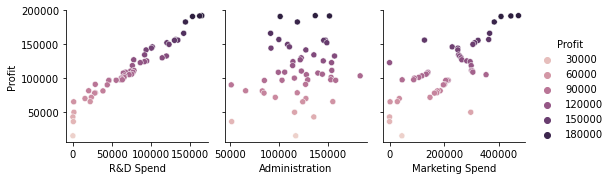

In [16]:
import seaborn as sns
# we give the dataframe as the input for the seasborn plots
sns.pairplot(df,x_vars=['R&D Spend','Administration','Marketing Spend'],y_vars='Profit',
            diag_kind=None,hue='Profit')
plt.show()

In [18]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [20]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [21]:
# state is present in text formate and machine learning algo best work on numerical data that's way 
# we convert/encode it into numerical.

In [22]:
# encoding the categorical values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],
                       remainder='passthrough')
x = ct.fit_transform(x)
print(x)
# alphabetically encode
# califoniya 1.0 0.0 0.0
# Florida    0.0 1.0 0.0
# New yark   0.0 0.0 1.0

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [23]:
## split x and y into training and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25,random_state=0)

In [24]:
## import the linear model and train it
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression()

In [25]:
## predict the output and calculate the errors and r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(x_te)
mae = mean_absolute_error(y_te,y_pred)
mse = mean_squared_error(y_te,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_te,y_pred)

In [26]:
print(mae)
print(mse)
print(rmse)
print(r2)

7024.539954004573
73809312.88230501
8591.234654128883
0.9315815199152024


In [27]:
# califoniya
lr.predict([[1,0,0,300000,300000,900000]])

array([319273.50463191])

In [28]:
# florida
lr.predict([[0,1,0,700000,100000,900000]])

array([621988.42851282])